# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [2]:
df = pd.read_csv('Train.csv') ##  read the data
df_test = pd.read_csv('Test.csv') ##  read the data

In [3]:
# Checking the number of rows and columns in the training data
df.shape ##   view dimensions of the train data

(40000, 41)

In [4]:
# Checking the number of rows and columns in the test data
df_test.shape ## view dimensions of the test data

(10000, 41)

## Data Overview

In [5]:
# let's create a copy of the training data
data = df.copy()

In [6]:
# let's create a copy of the training data
data_test = df_test.copy()

In [9]:
# let's view the first 5 rows of the data
data.head() ## view top 5 rows of the data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


In [10]:
# let's view the last 5 rows of the data
data.tail() ##  view last 5 rows of the data  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


In [11]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

In [14]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  check dulicate entries in the data

0

In [15]:
# let's check for missing values in the data
data.isnull().sum() ##  check missing entries in the train data

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [16]:
# let's check for missing values in the data
data_test.isnull().sum() ##   check missing entries in the test data

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [17]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ## print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


## EDA

### Univariate analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting histograms and boxplots for all the variables

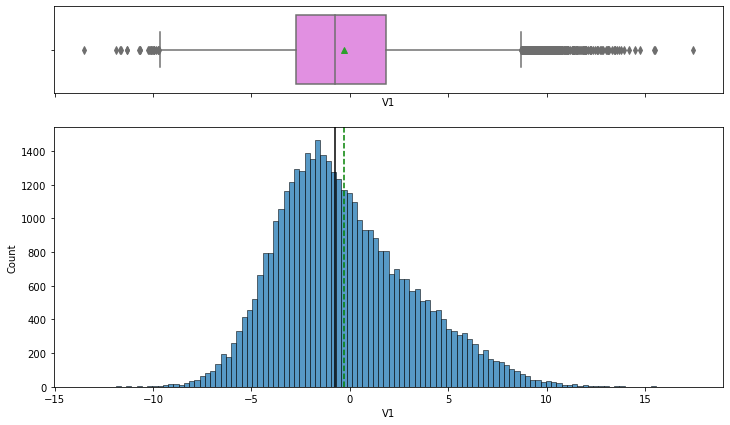

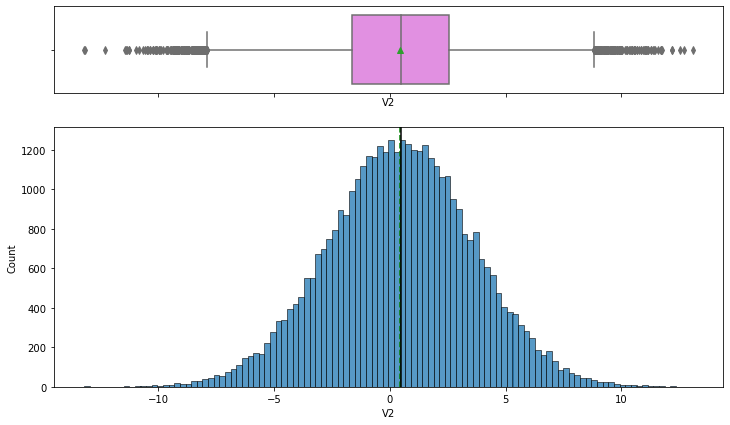

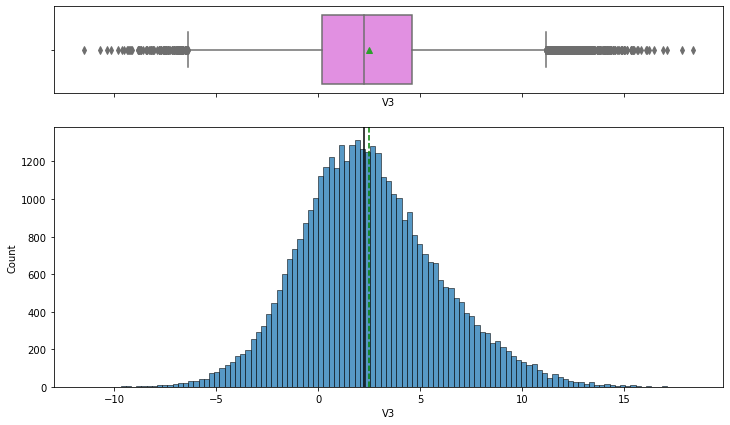

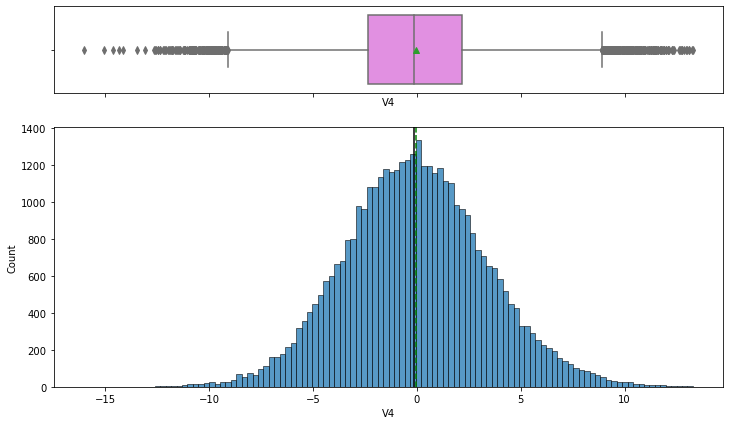

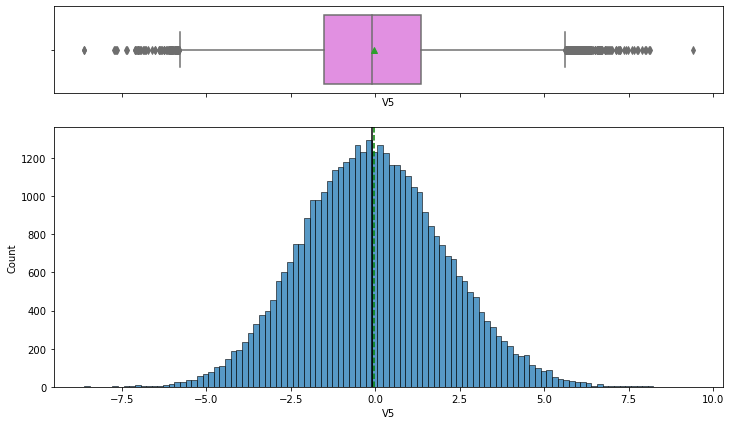

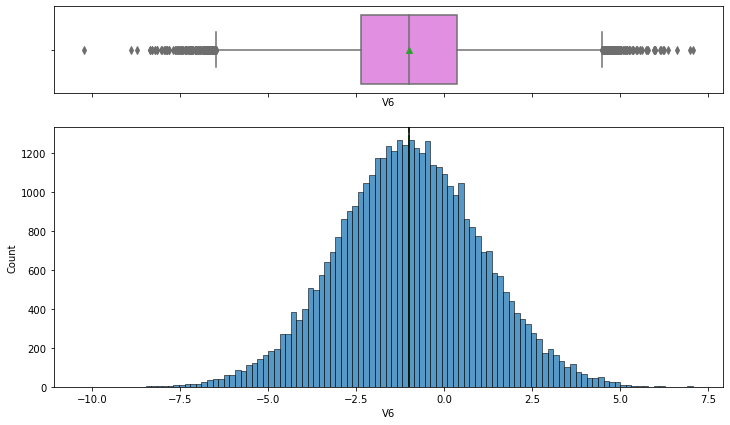

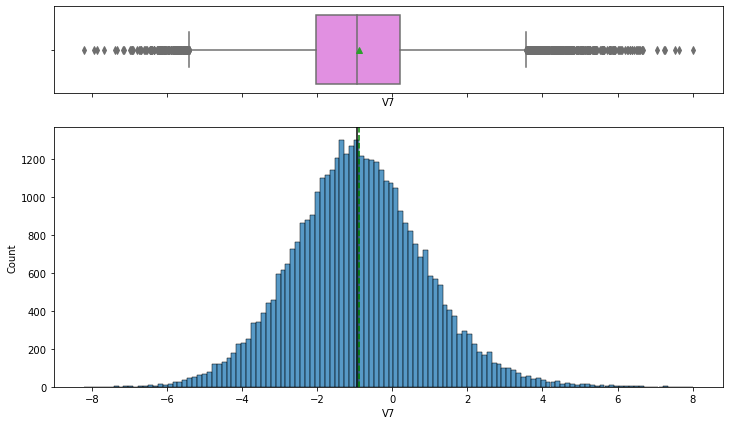

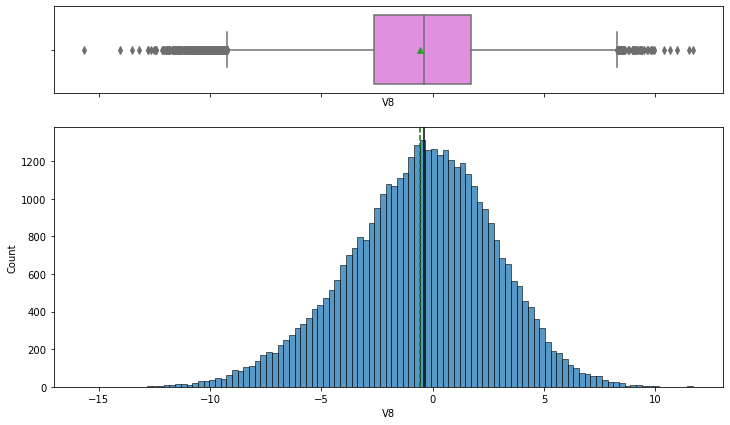

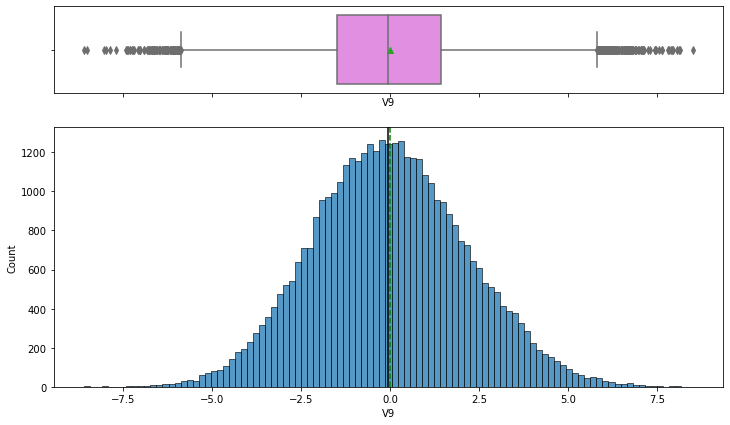

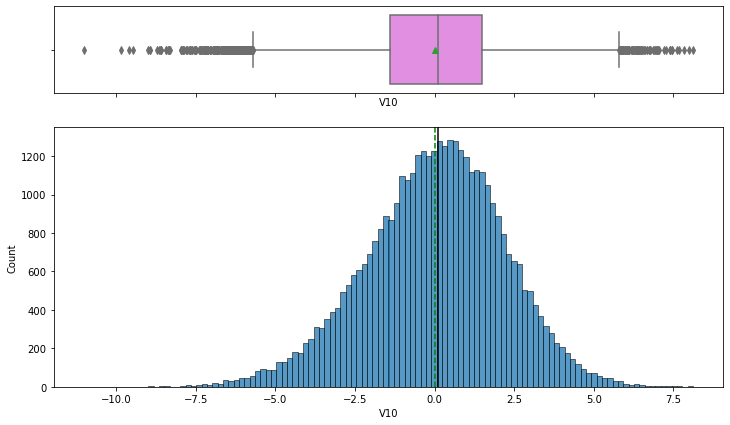

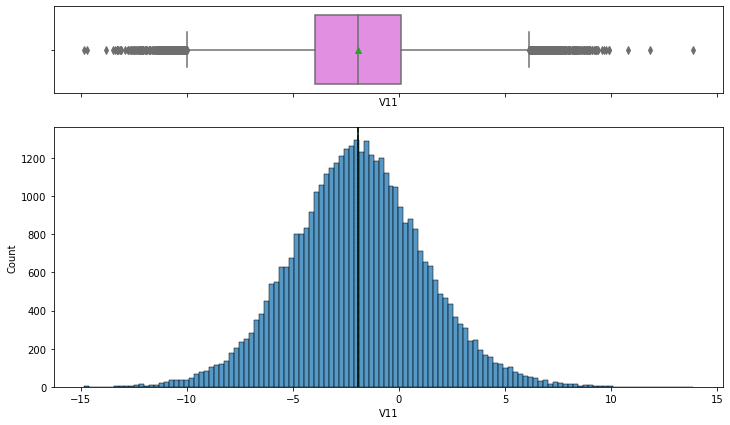

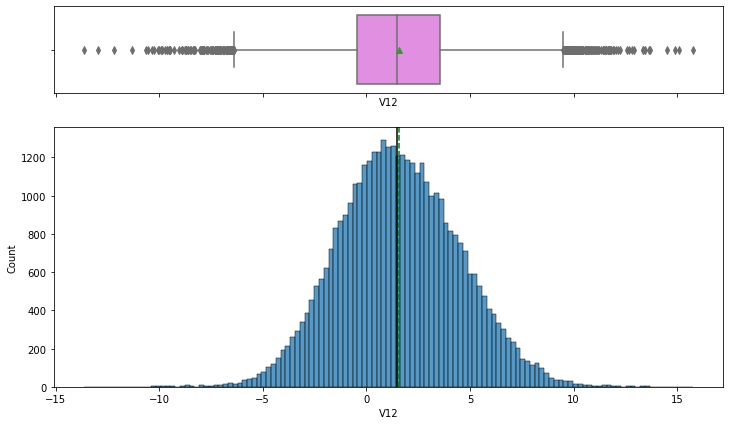

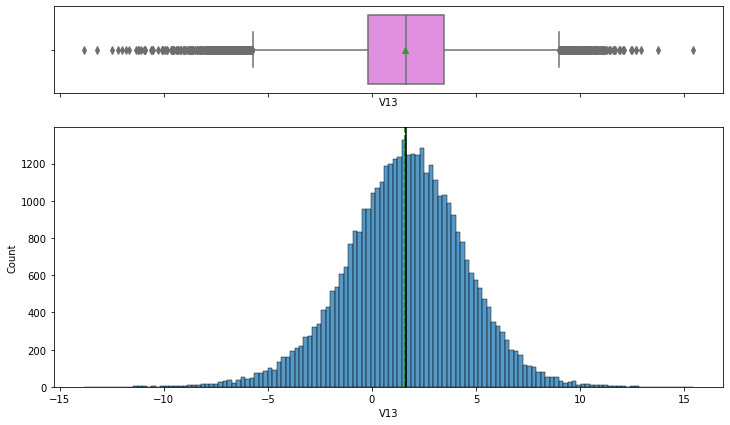

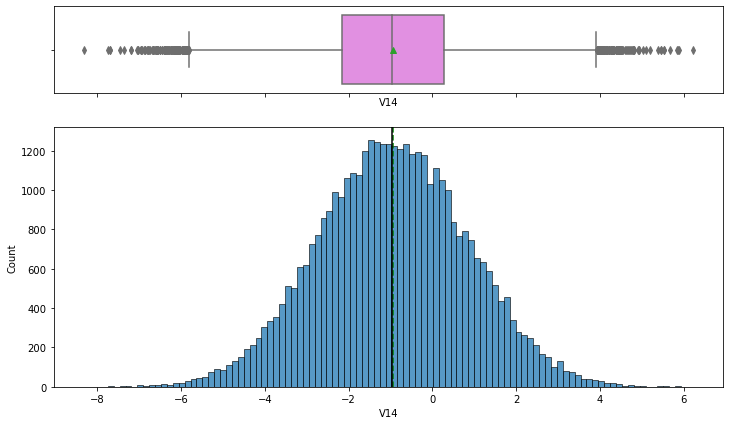

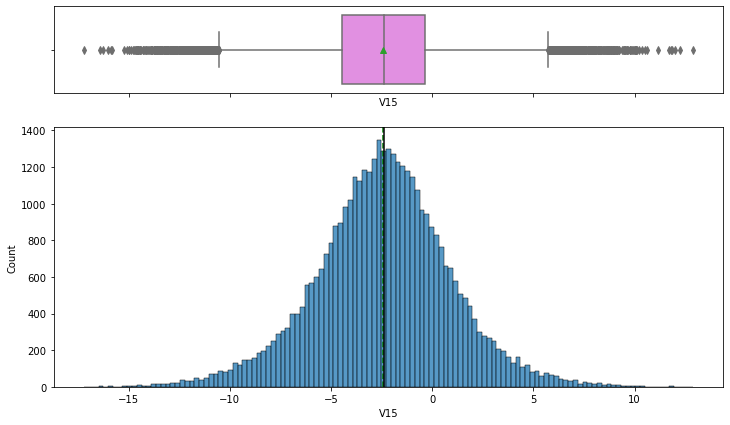

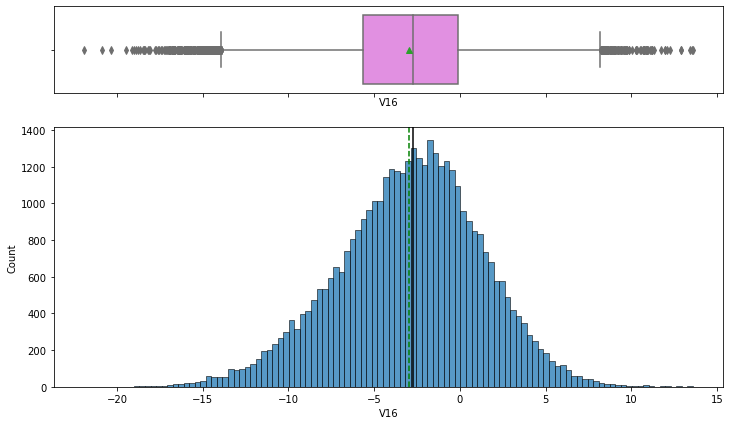

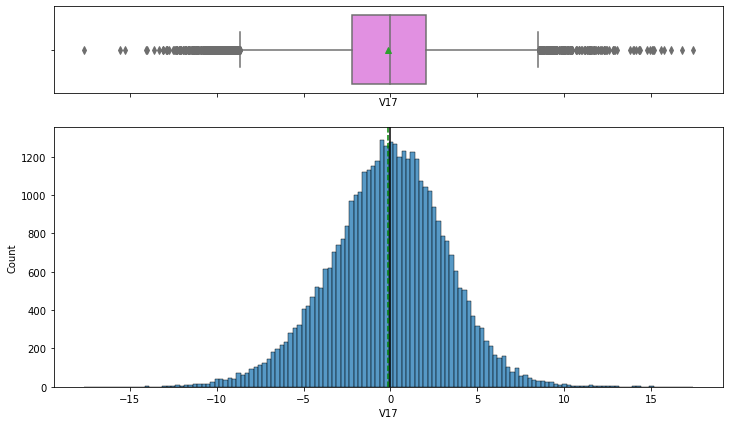

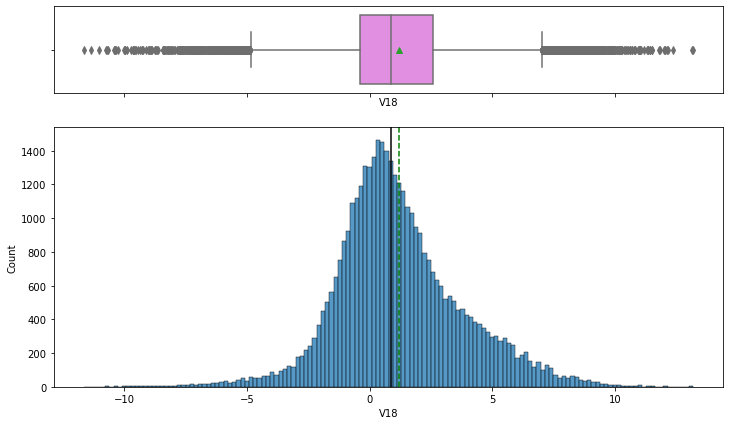

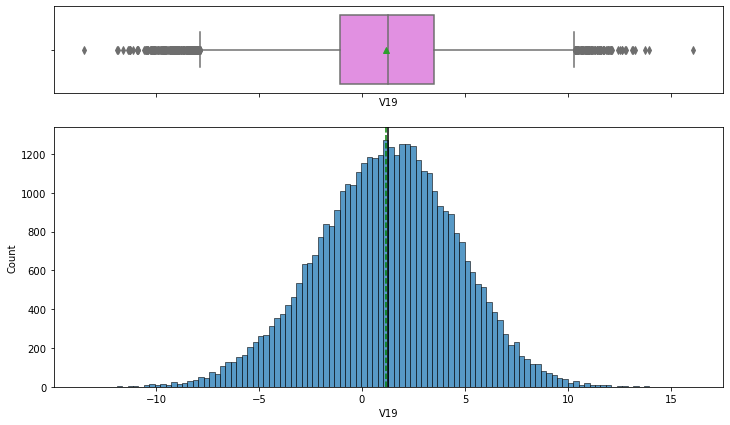

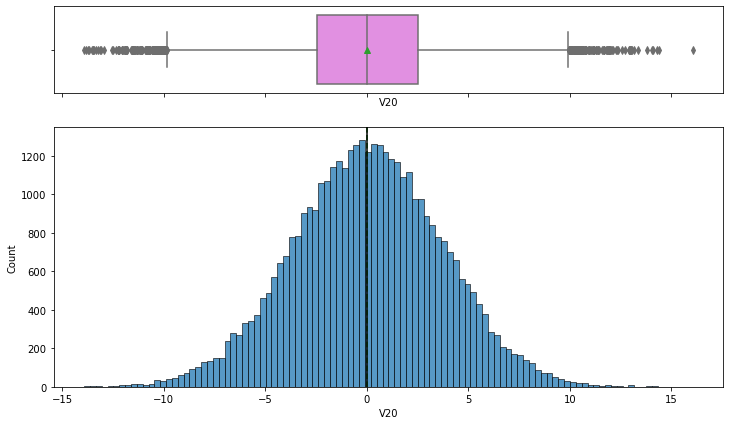

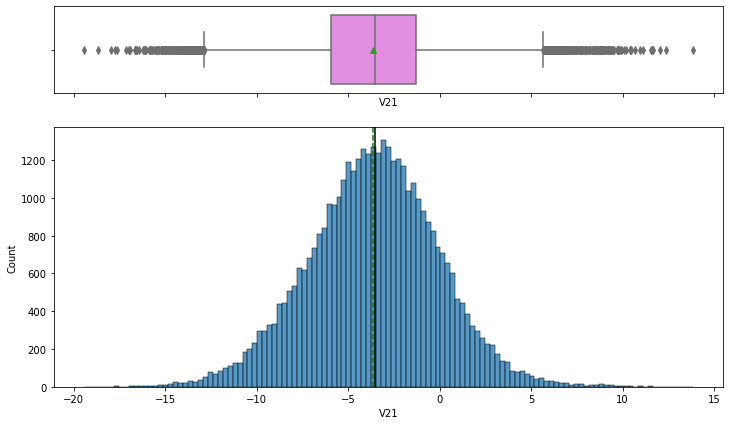

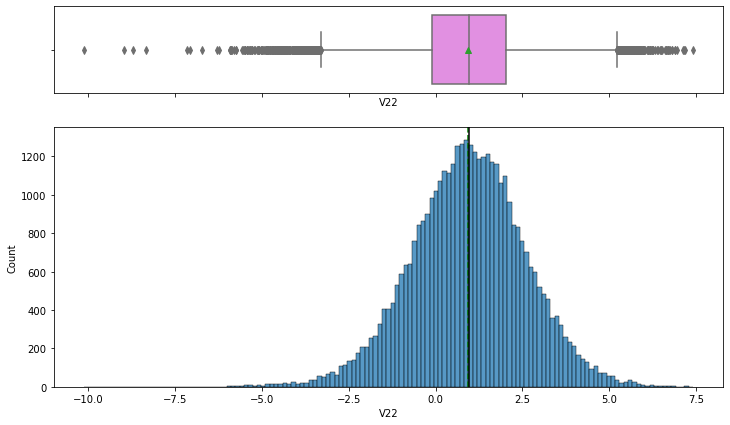

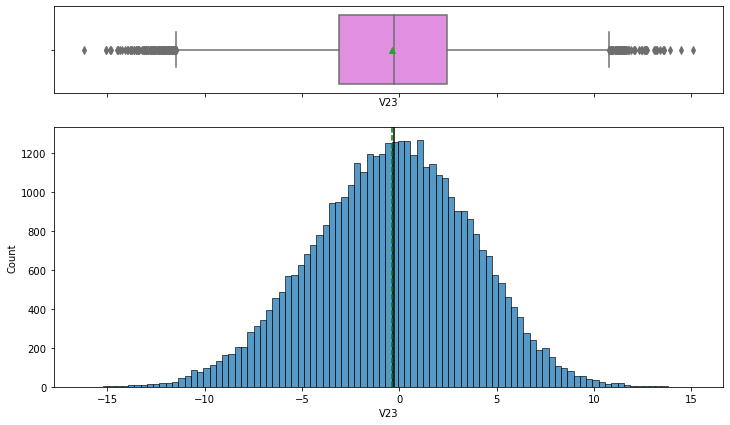

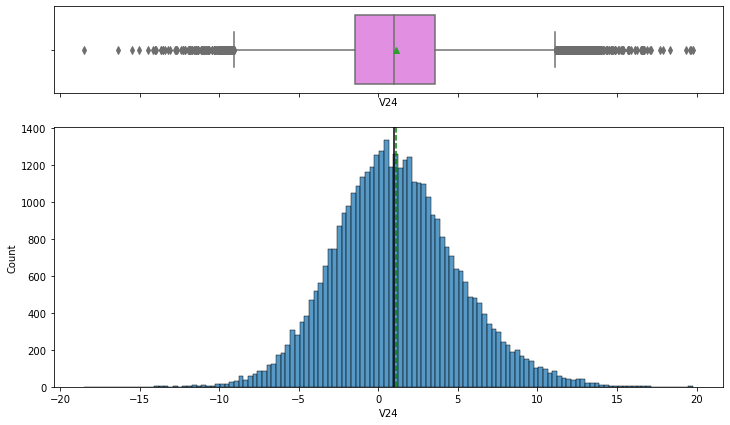

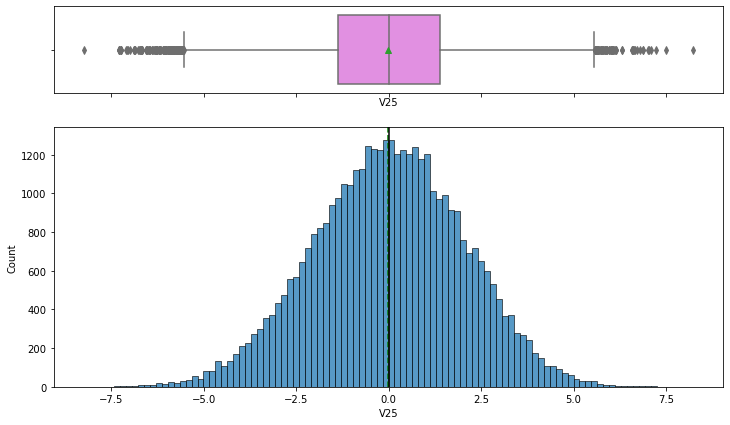

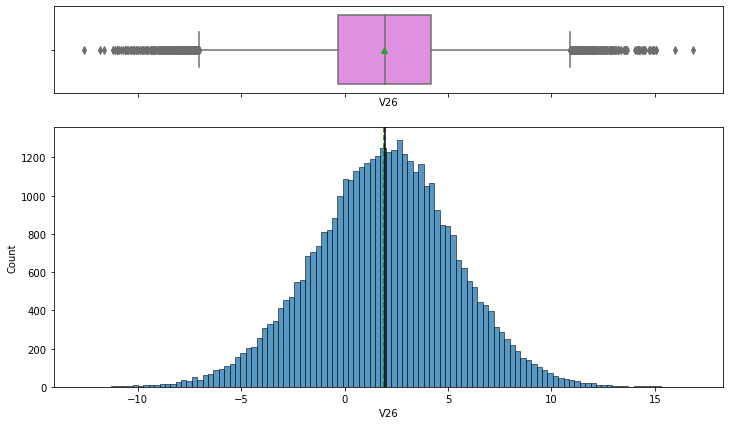

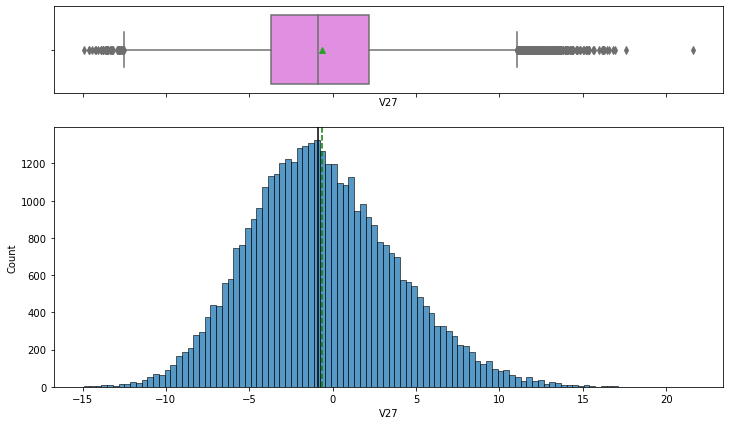

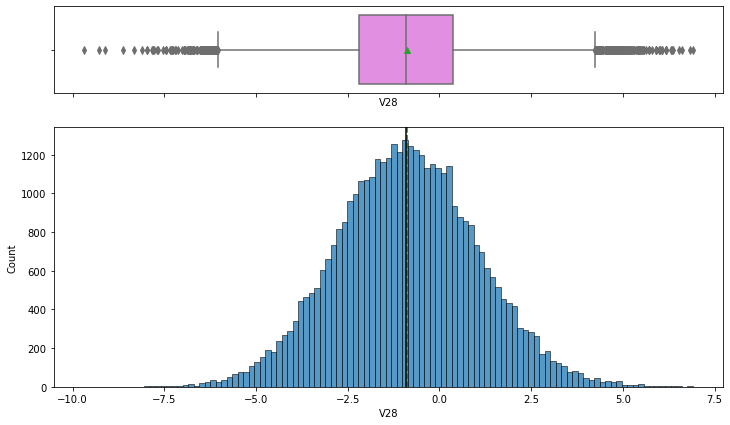

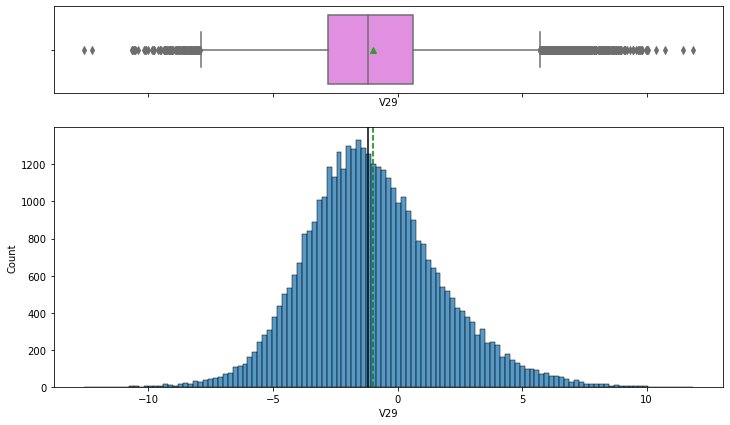

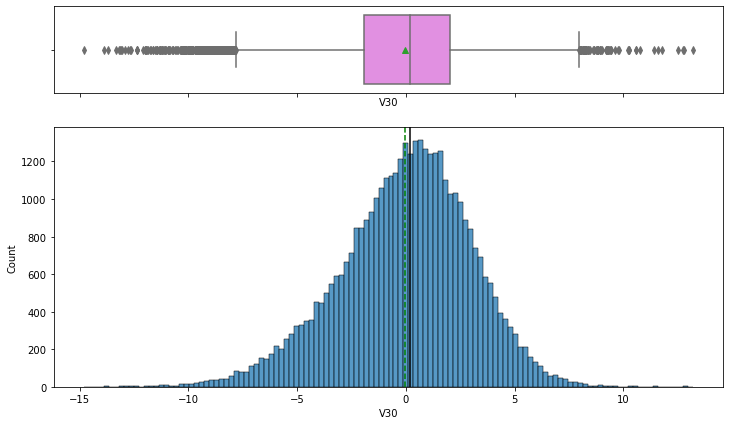

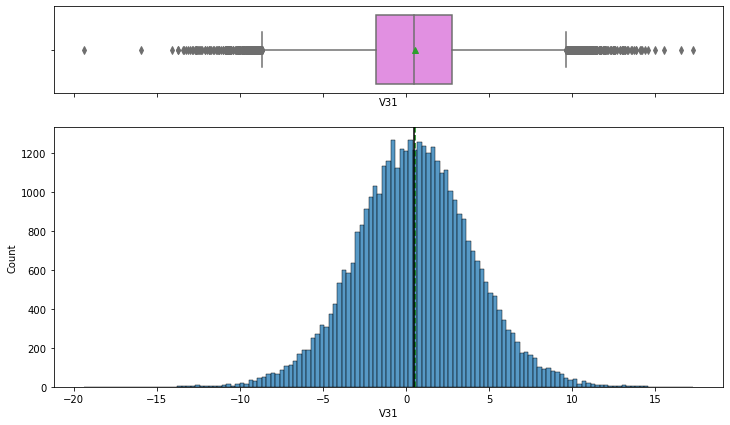

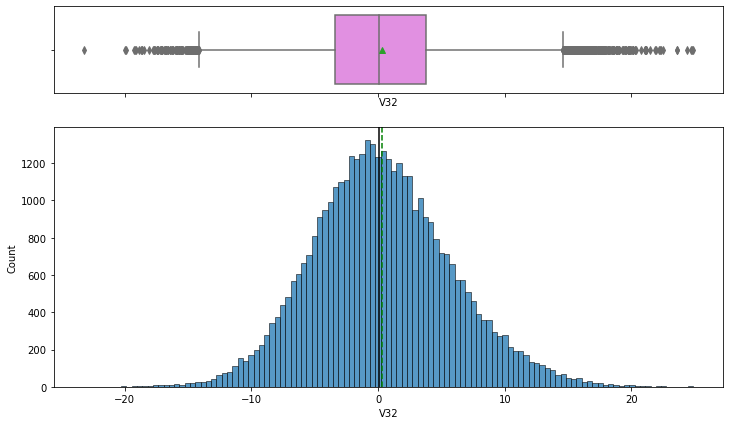

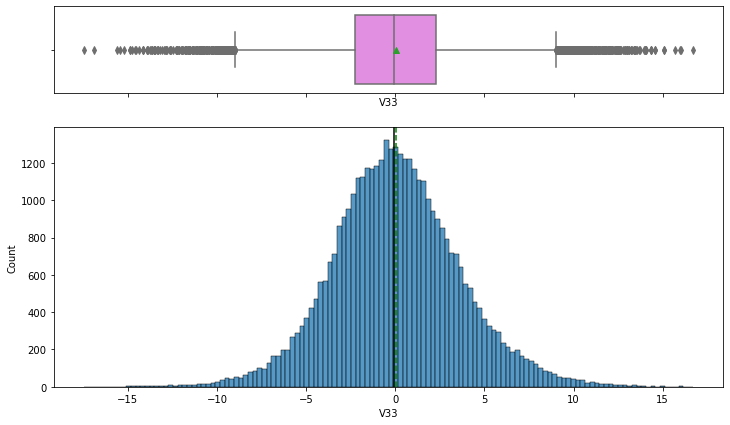

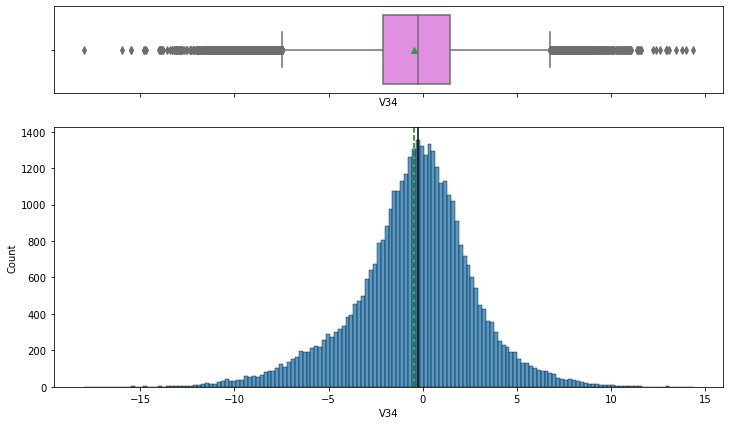

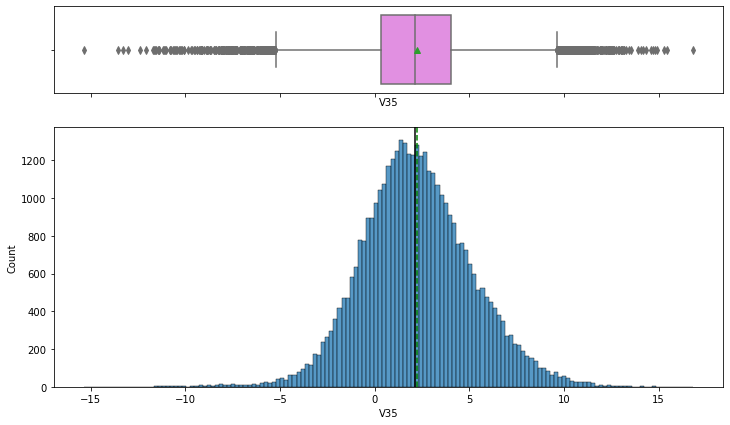

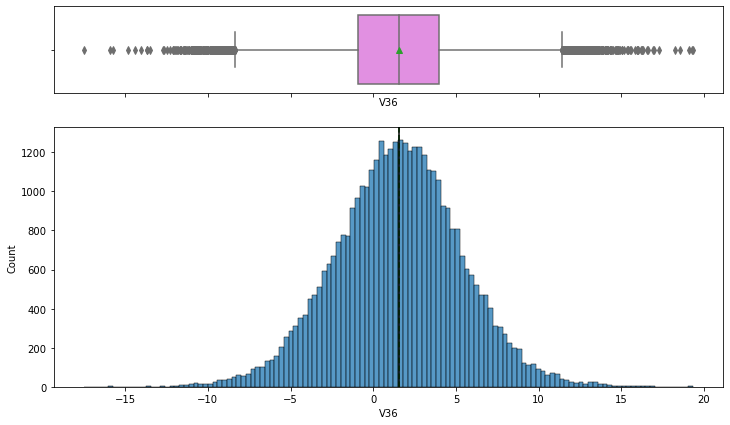

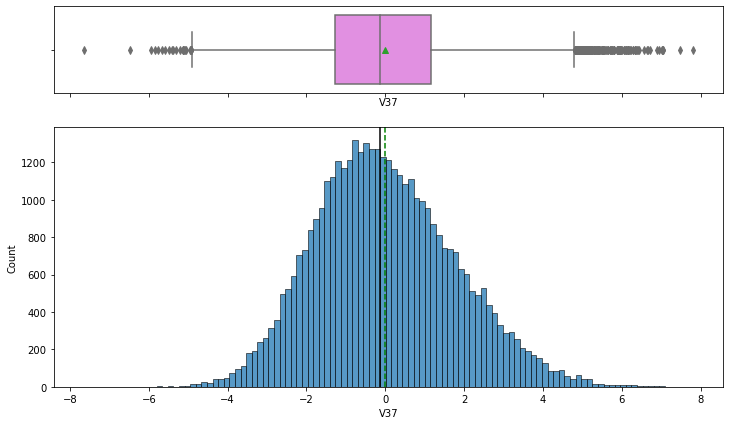

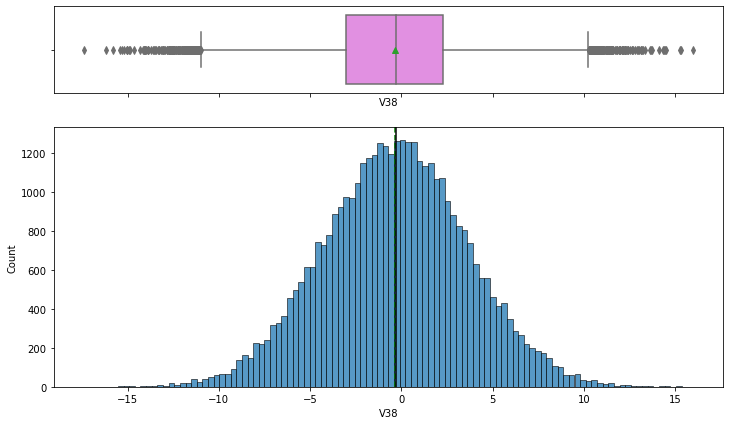

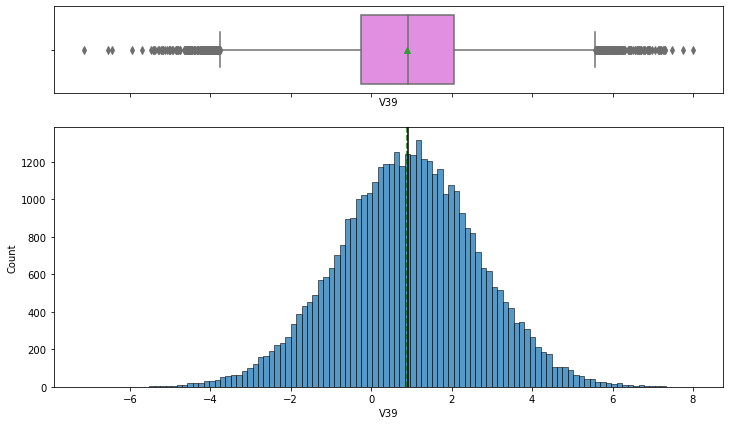

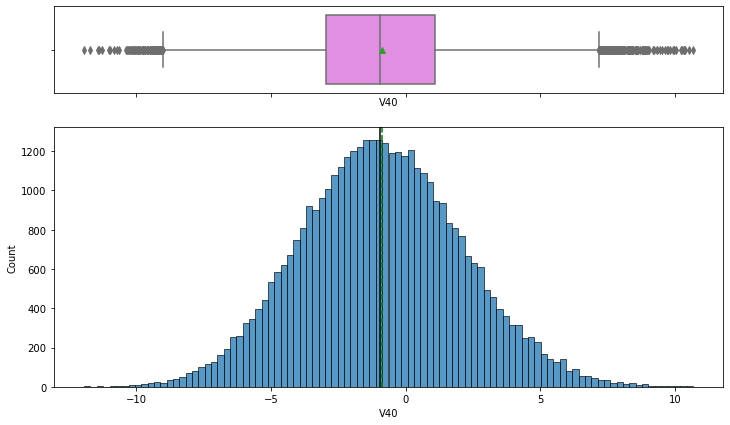

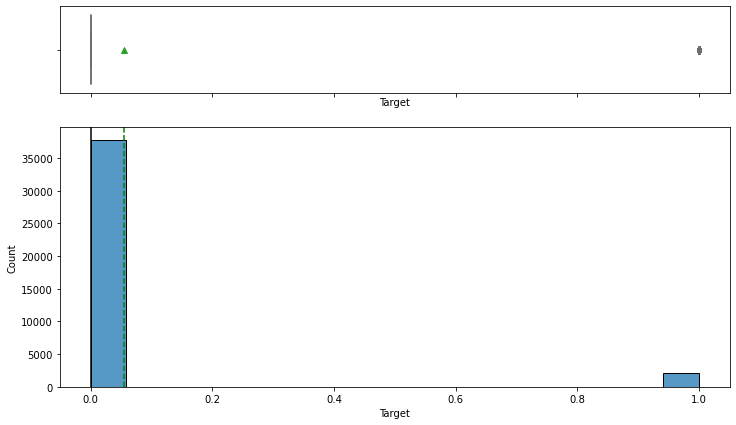

In [19]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

### Let's look at the values in target variable

In [20]:
data["Target"].value_counts() ##  check the class distribution in target variable for train data

0    37813
1     2187
Name: Target, dtype: int64

In [21]:
data_test["Target"].value_counts() ##  check the class distribution in target variable for test data

0    9453
1     547
Name: Target, dtype: int64

## Data Pre-Processing

In [7]:
# Dividing data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

X_test = data_test.drop(["Target"], axis=1) ##   drop target variable from test data
y_test = data_test["Target"] ##  store target variable in y_test

In [8]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1) ##  split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(30000, 40) (10000, 40) (10000, 40)


In [9]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

In [10]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val =  pd.DataFrame(imputer.transform(X_val), columns=X_train.columns) ##  impute missing values in X_val

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns) ##  impute missing values in X_test

In [11]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum()) ##  check the count of missing values in test set

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [12]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

In [13]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [14]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model Building on original data

In [16]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ##  append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.47580547112462
Bagging: 0.7190881458966565
GBM: 0.7203094777562863
Adaboost: 0.6074587823523994
Random Forest: 0.7615529151699365
dtree: 0.7366712719904209

Validation Performance:

Logistic regression: 0.4805194805194805
Bagging: 0.7532467532467533
GBM: 0.75139146567718
Adaboost: 0.6159554730983302
Random Forest: 0.7959183673469388
dtree: 0.7569573283858998


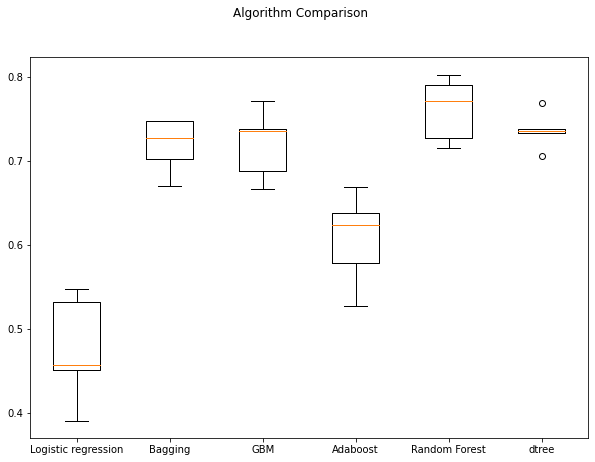

In [17]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [18]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 1648
Before OverSampling, counts of label '0': 28352 

After OverSampling, counts of label '1': 28352
After OverSampling, counts of label '0': 28352 

After OverSampling, the shape of train_X: (56704, 40)
After OverSampling, the shape of train_y: (56704,) 



In [19]:
models2 = []  # Empty list to store all the models

# Appending models into the list
models2.append(("Logistic regression", LogisticRegression(random_state=1)))
models2.append(("Bagging", BaggingClassifier(random_state=1)))
models2.append(("GBM", GradientBoostingClassifier(random_state=1)))
models2.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models2.append(("Random Forest", RandomForestClassifier(random_state=1)))
models2.append(("dtree", DecisionTreeClassifier(random_state=1))) ##  append remaining 4 models in the list models

results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models2:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result2 = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result2)
    names2.append(name)
    print("{}: {}".format(name, cv_result2.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models2:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.8670991153046053
Bagging: 0.9727708192023716
GBM: 0.9140092932357671
Adaboost: 0.8872033493217293
Random Forest: 0.9822938823315006
dtree: 0.9681149833445136

Validation Performance:

Logistic regression: 0.8701298701298701
Bagging: 0.8367346938775511
GBM: 0.8961038961038961
Adaboost: 0.8849721706864564
Random Forest: 0.87569573283859
dtree: 0.8126159554730983


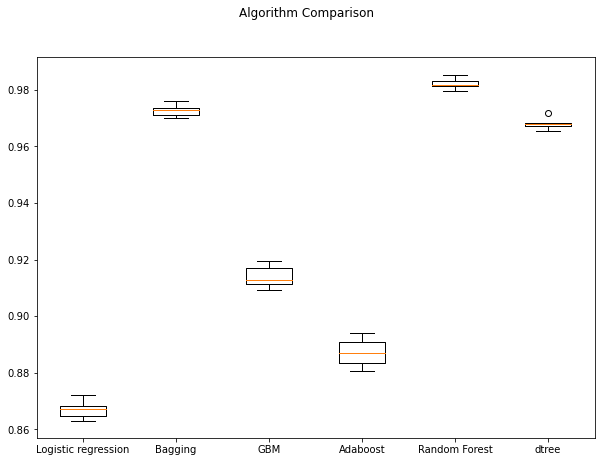

In [20]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names2)

plt.show() ## Write the code to create boxplot to check model performance on over sampled data

### Model Building with undersampled data

In [21]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 1648
Before UnderSampling, counts of label '0': 28352 

After UnderSampling, counts of label '1': 1648
After UnderSampling, counts of label '0': 1648 

After UnderSampling, the shape of train_X: (3296, 40)
After UnderSampling, the shape of train_y: (3296,) 



In [22]:
models3 = []  # Empty list to store all the models

# Appending models into the list
models3.append(("Logistic regression", LogisticRegression(random_state=1)))
models3.append(("Bagging", BaggingClassifier(random_state=1)))
models3.append(("GBM", GradientBoostingClassifier(random_state=1)))
models3.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models3.append(("Random Forest", RandomForestClassifier(random_state=1)))
models3.append(("dtree", DecisionTreeClassifier(random_state=1))) ##  append remaining 4 models in the list models

results3 = []  # Empty list to store all model's CV scores
names3 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models3:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result3 = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result3)
    names3.append(name)
    print("{}: {}".format(name, cv_result3.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models3:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores)) ##  build models on undersampled data 
## Note - Take reference from the original models built above


Cross-Validation Cost:

Logistic regression: 0.8440563691627523
Bagging: 0.8646808510638297
GBM: 0.8810776457584968
Adaboost: 0.8586257713917288
Random Forest: 0.8865395597310493
dtree: 0.8543704522427926

Validation Performance:

Logistic regression: 0.8775510204081632
Bagging: 0.8738404452690167
GBM: 0.8923933209647495
Adaboost: 0.8775510204081632
Random Forest: 0.9053803339517625
dtree: 0.8738404452690167


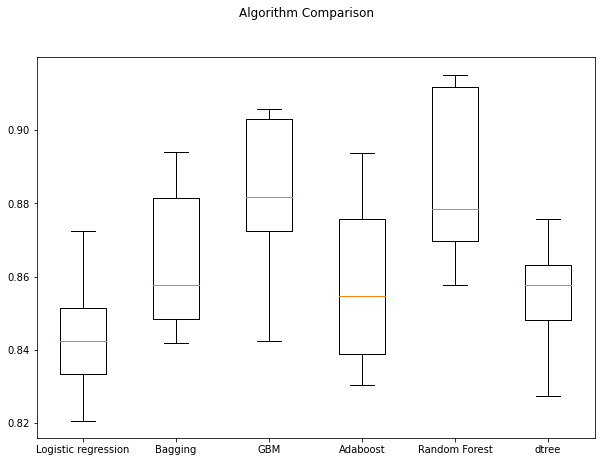

In [23]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names3) 

plt.show() ## Write the code to create boxplot to check model performance on under sampled data

## Hyperparameter Tuning

### Tuning Bagging classifier using oversampled data

In [24]:
%%time 

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ##  fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:
CPU times: total: 2.03 s
Wall time: 1h 13min 54s


In [25]:
# Creating new pipeline with best parameters
tuned_bag2 = BaggingClassifier(
    max_features=0.9, random_state=1, max_samples=0.9, n_estimators=50
)

tuned_bag2.fit(X_train_over, y_train_over) ##  fit the model on over sampled data

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [26]:
bag2_train_perf = model_performance_classification_sklearn(tuned_bag2, X_train_over, y_train_over)
bag2_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [27]:
bag2_val_perf = model_performance_classification_sklearn(tuned_bag2, X_val, y_val) ##  check the performance on validation set
bag2_val_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.866,0.879,0.873


### Tuning Random forest using oversampled data

In [28]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)  ##  fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9794371935311217:
CPU times: total: 1min 41s
Wall time: 56min 54s


In [29]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.5000000000000001,
    n_estimators=250,
    min_samples_leaf=1,
)

tuned_rf2.fit(X_train_over, y_train_over) ##  fit the model on over sampled data

RandomForestClassifier(max_features='sqrt', max_samples=0.5000000000000001,
                       n_estimators=250, random_state=1)

In [30]:
rf2_train_perf = model_performance_classification_sklearn(tuned_rf2, X_train_over, y_train_over) ##  check the performance on oversampled train set
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.999,0.998,1.000,0.999


In [31]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val) ##  check the performance on validation set
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.990,0.881,0.926,0.903


### Tuning Gradient Boosting using oversampled data

In [32]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.9585569516246057:
CPU times: total: 1min 18s
Wall time: 34min 45s


In [33]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features="sqrt",
    random_state=1,
    #max_samples=0.5,
    n_estimators=250,
    min_samples_leaf=1,
)

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features='sqrt', n_estimators=250,
                           random_state=1)

In [34]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.954,0.927,0.981,0.953


In [35]:
gbm_val_perf = model_performance_classification_sklearn(
    tuned_gbm, X_val, y_val
)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.975,0.894,0.718,0.797


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model Performance comparison

In [36]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        bag2_train_perf.T,
        rf2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "Bagging classifier tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,Bagging classifier tuned with oversampled data,Random forest tuned with oversampled data
Accuracy,0.954,1.000,0.999
Recall,0.927,1.000,0.998
Precision,0.981,1.000,1.000
F1,0.953,1.000,0.999


In [37]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        bag2_val_perf.T,
        rf2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "Bagging classifier tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df ## Write the code to compare the performance on validation set

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,Bagging classifier tuned with oversampled data,Random forest tuned with oversampled data
Accuracy,0.975,0.986,0.990
Recall,0.894,0.866,0.881
Precision,0.718,0.879,0.926
F1,0.797,0.873,0.903


**Now we have our final model, so let's find out how our model is performing on unseen test data.**

In [38]:
# Let's check the performance on test set
gbm_perf_test = model_performance_classification_sklearn(tuned_gbm, X_test, y_test)
print("Test performance:")
gbm_perf_test ## Write the code to check the performance of best model on test data

Test performance:


,Accuracy,Recall,Precision,F1
0,0.974,0.872,0.718,0.788


### Feature Importances

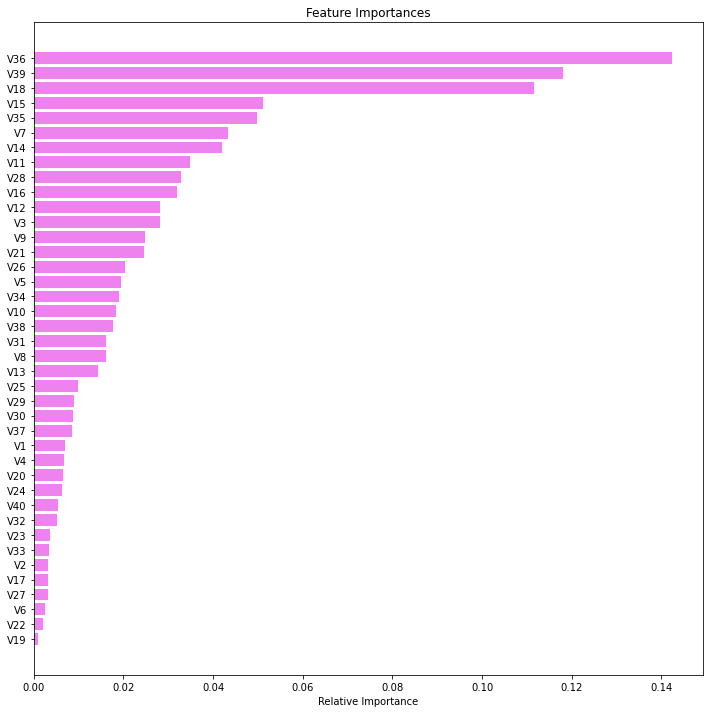

In [39]:
feature_names = X_train.columns
importances =  tuned_gbm.feature_importances_ ##  check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [62]:
model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='median')),
        (
            "GBM",
            GradientBoostingClassifier(
            max_features='sqrt', 
            n_estimators=250,
            random_state=1
        ),
        ),
    ]
)
 ##  create pipeline for the best model

In [63]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.drop(columns="Target") ##   drop target variable from test data
y_test1 = df_test["Target"] ##   store target variable in y_test1

In [64]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# let's treat the missing values in the test set
X2 = imputer.fit_transform(X_test1) ##   treat the missing values in the test set

In [60]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [65]:
model.fit(X_over1, y_over1) ##   fit the Model obtained from above step

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('GBM',
                 GradientBoostingClassifier(max_features='sqrt',
                                            n_estimators=250,
                                            random_state=1))])

In [66]:
model.predict(X_test1) ##   make predictions on the test data using the productionized Model

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)